<a href="https://colab.research.google.com/github/vichierro/RegistroEstacionamento/blob/main/Filtro_Voz_IIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento Digital Sinais - 2023.2**
# Filtragem de sinais de voz


- Equipe:
  - Emanoel Cristhian Leão Marinho (201806840098)
  - Victor Hierro Moraes Ferreira (201806840071)

# Importação dos pacotes e leitura do sinal.

In [ ]:
# Importação dos pacotes.
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import numpy as np
from scipy.fftpack import fft, fftshift
from scipy import signal
import scipy.signal as sp

In [ ]:
# Leitura do sinal
voice_signal, fs_original = sf.read('/content/audio.wav')
t = np.arange(0, len(voice_signal) * 1/fs_original, 1/fs_original)
print(fs_original)

48000


# Gráfico do sinal do aúdio e da transformada Fourier

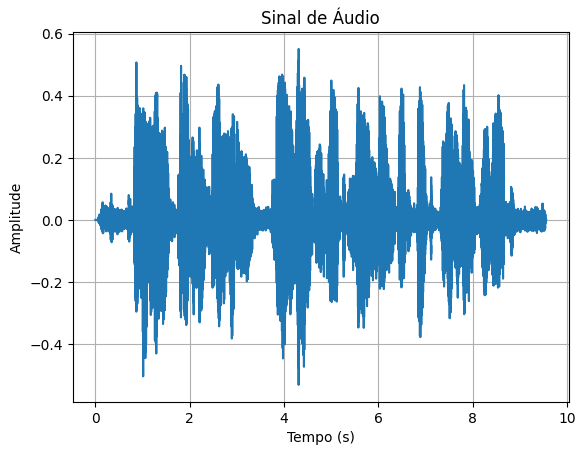

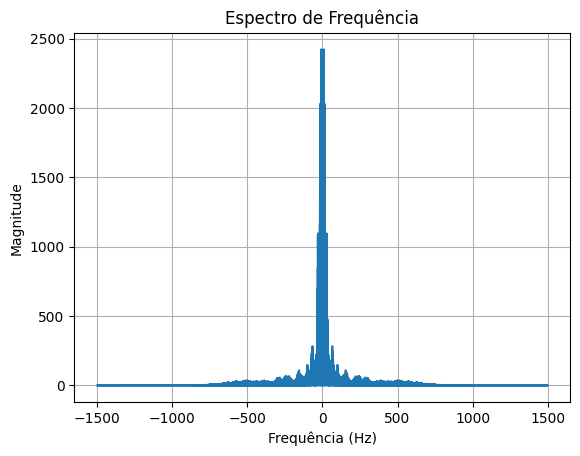

In [ ]:
def plot_audio_signal(voice_signal, fs_original):
    # Calcular o eixo de tempo em segundos
    duration = len(voice_signal) / fs_original
    time = np.linspace(0., duration, len(voice_signal))

    # Plotar o gráfico do sinal de áudio
    plt.figure()
    plt.plot(time, voice_signal)
    plt.title('Sinal de Áudio')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_fft(voice_signal, fs_original):
    # Cálculo da FFT
    fft = np.fft.fft(voice_signal)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(voice_signal), 1/fs_original)

    # Plot do espectro de frequência
    plt.figure()
    plt.plot(frequency, magnitude)
    plt.title('Espectro de Frequência')
    plt.xlabel('Frequência (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

plot_audio_signal(voice_signal, fs_original)
print('\n')
plot_fft(voice_signal, fs_original/16)

Exibição do sinal de voz

# Filtro IIR - Lowpass
Definindo frequencia de corte para 5khz para a passagem de banda e remoção das frequencias mais altas. Levando em consideração a frequencia Nyquist sendo metade da frequencia original do sinal amostrado (48000 a frequencia original e 24000 a frequencia nyquist). Utilizando a aproximação "ellip" para esse os demais filtros do trabalho devido a seu sinal de saída possuir maior qualidade no sinal reamostrado exportado.

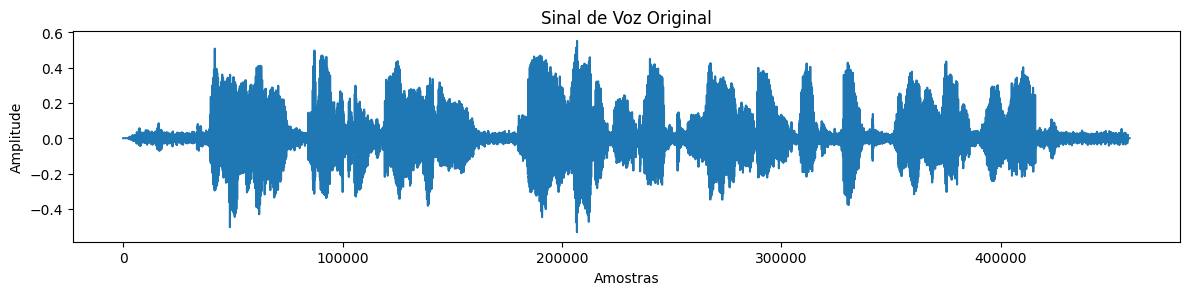

In [ ]:
# Especificações do filtro
gp = 1                # ganho da banda de passagem (dB)
gs = 30               # ganho da banda de rejeição (atenuação mínima, em dB)

fss = fs_original     # frequência de amostragem (Hz)
fn = fss / 2          # frequência de Nyquist
fp2 = 5000            # passband frequency (Hz)
fs2 = 6000            # stopband frequency (Hz)

filtype = 'ellip'                                # tipo de aproximação do filtro
b, a = sp.iirdesign(fs=fss, wp=fp2,
                    ws=fs2, gpass=gp,
                    gstop=gs, analog=False,
                    ftype=filtype, output='ba')  # função do filtro IIR

# Aplicar o filtro ao sinal de voz
filtered_signal = sp.lfilter(b, a, voice_signal)

# # Downsampling para 8 kHz
# target_sample_rate = 8000
# downsample_factor = int(fs_original / target_sample_rate)
# downsampled_signal = filtered_signal[::downsample_factor]

# # Upsampling com interpolação
# upsampled_signal = sp.resample(downsampled_signal, len(filtered_signal))

# Plot dos sinais
plt.figure(figsize=(12, 8))

# Sinal de voz original
plt.subplot(3, 1, 1)
plt.plot(voice_signal)
plt.title('Sinal de Voz Original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


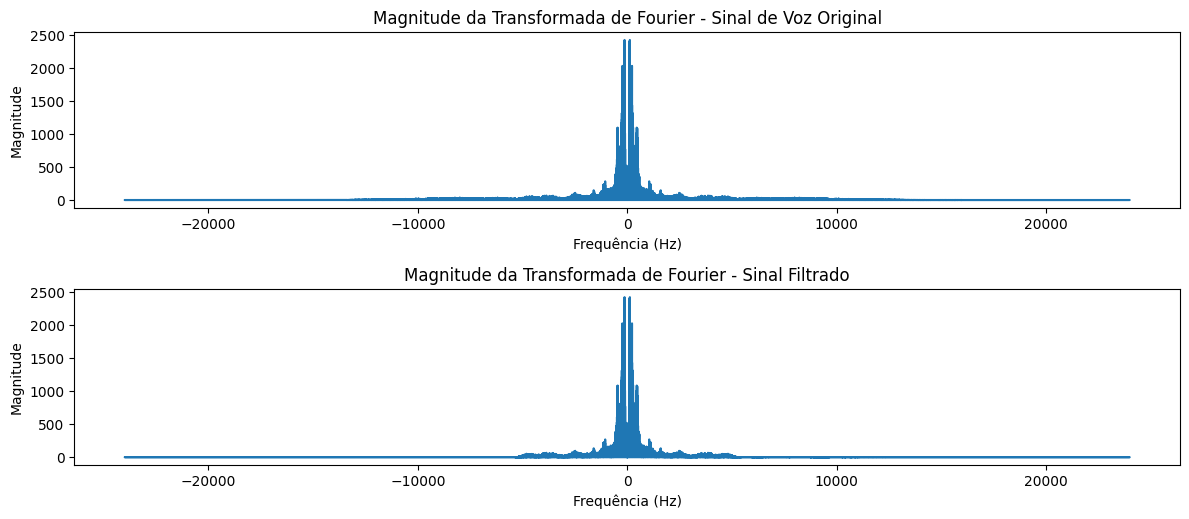

In [ ]:
# Cálculo da Transformada de Fourier
voice_fft = np.abs(np.fft.fft(voice_signal))
filtered_fft = np.abs(np.fft.fft(filtered_signal))

# Frequências correspondentes à Transformada de Fourier
frequencies = np.fft.fftfreq(len(voice_signal), d=1/fs_original)

# Plot dos gráficos da magnitude da Transformada de Fourier
plt.figure(figsize=(12, 10))

# Sinal de voz original
plt.subplot(4, 1, 1)
plt.plot(frequencies, voice_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal de Voz Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado
plt.subplot(4, 1, 2)
plt.plot(frequencies, filtered_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


Observa-se o corte de frequencias mais altas no do sinal original no sinal já filtrado.

Resposta em frequência do filtro.

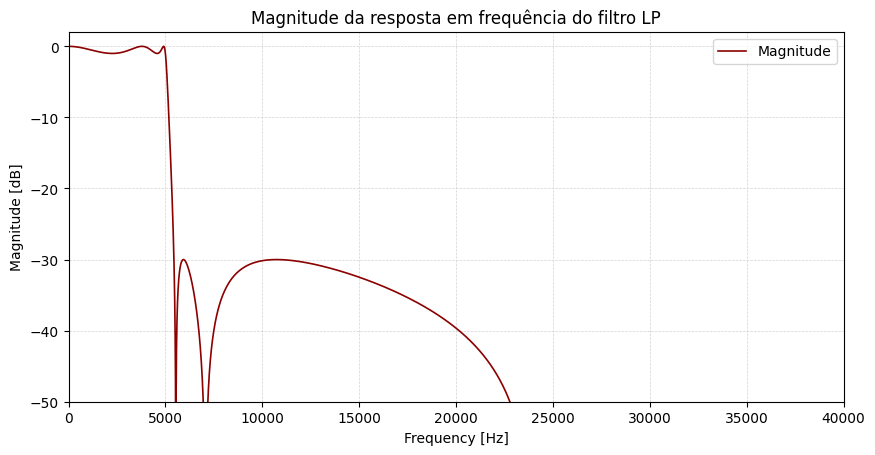

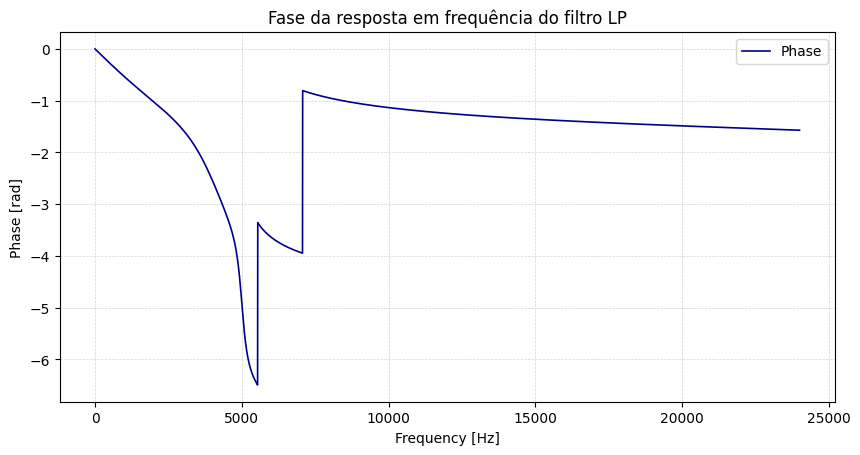

In [ ]:
# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10(abs(h))         # Magnitude da resposta de frequência (dB)
h_ang = np.unwrap(np.angle(h))         # Fase de resposta de frequência

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Magnitude da resposta em frequência do filtro LP')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,40000, -50,2])

## Gera legenda
plt.legend()
plt.show()

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_ang , linewidth = 1.20, label = 'Phase', color='darkblue')
plt.title('Fase da resposta em frequência do filtro LP')
plt.ylabel('Phase [rad]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)

## Gera legenda
plt.legend()
plt.show()

In [ ]:
print('Ordem do filtro LP: ', len(a)-1)

Ordem do filtro LP:  5


# Filtro Downsampling
Filtro que realiza a alteração da frequencia do sinal original de 48 khz para 8 khz a partir do cálculo do fator de downsampling (fator em que a frequencia do sinal será reduzida. No caso o fator é 6) para reduzir sua frequencia e consequentemente o tamanho do sinal (numero de amostras).

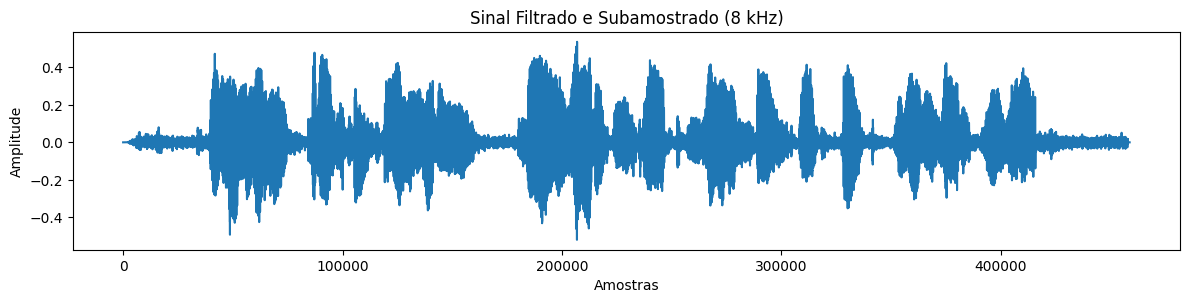

In [ ]:
# Especificações do filtro original (48 kHz)
gp = 1          # Ganho da banda de passagem (dB)
gs = 30         # Ganho da banda de rejeição (atenuação mínima, em dB)
fss = 48000     # Frequência de amostragem original (Hz)
fp2 = 5000      # Frequência de passagem (Hz)
fs2 = 6000      # Frequência de rejeição (Hz)

# Especificações para o filtro downsampling (8 kHz)
fss_ds = 8000   # nova frequência de amostragem (Hz)

# Fator de downsampling
ds_factor = int(fss / fss_ds)

# Nova frequência de passagem e rejeição do filtro downsampling
fp2_ds = fp2 / ds_factor
fs2_ds = fs2 / ds_factor

# Projeto do filtro IIR original
filtype = 'ellip'  # tipo de aproximação
b, a = sp.iirdesign(fs=fss, wp=fp2, ws=fs2,
                    gpass=gp, gstop=gs, analog=False,
                    ftype=filtype, output='ba')

# Downsampling do filtro projetado
b_ds = b
a_ds = np.convolve(a, [1.0, -1.0], mode='full')[::ds_factor]

# Aplicar o filtro ao sinal de voz
down_signal = sp.lfilter(b, a, filtered_signal)

# Cálculo da resposta em frequência do filtro downsampling
w_ds, h_ds = sp.freqz(b_ds, a_ds, 2**12, fs=fss_ds)
h_mag_ds = 20 * np.log10(abs(h_ds))   # Magnitude da resposta em frequência (dB)
h_ang_ds = np.unwrap(np.angle(h_ds))  # Fase da resposta em frequência

# Plot dos sinais
plt.figure(figsize=(12, 8))

# Sinal de voz filtrado e subamostrado
plt.subplot(3, 1, 2)
plt.plot(down_signal)
plt.title('Sinal Filtrado e Subamostrado (8 kHz)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


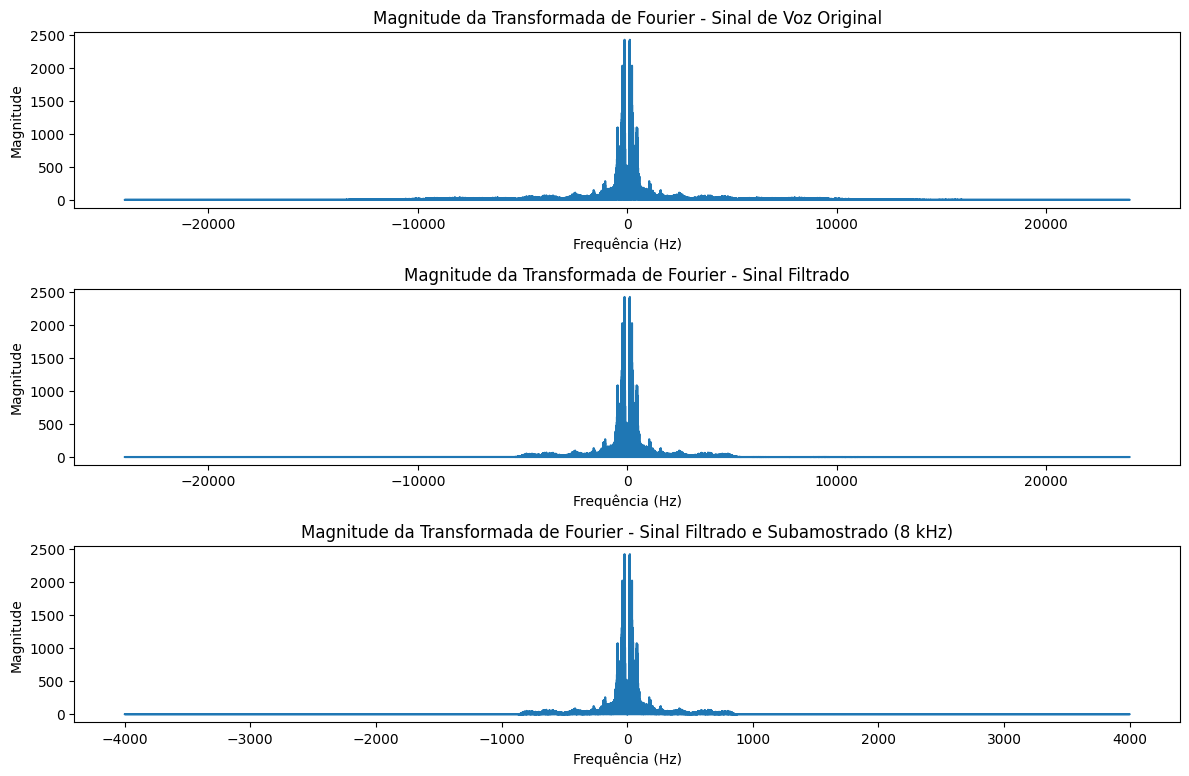

In [ ]:
# Cálculo da Transformada de Fourier
voice_fft = np.abs(np.fft.fft(voice_signal))
filtered_fft = np.abs(np.fft.fft(filtered_signal))
downsampled_fft = np.abs(np.fft.fft(down_signal))

# Frequências correspondentes à Transformada de Fourier
frequencies = np.fft.fftfreq(len(voice_signal), d=1/fs_original)
downsampled_frequencies = np.fft.fftfreq(len(down_signal), d=1/8000)

# Plot dos gráficos da magnitude da Transformada de Fourier
plt.figure(figsize=(12, 10))

# Sinal de voz original
plt.subplot(4, 1, 1)
plt.plot(frequencies, voice_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal de Voz Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado
plt.subplot(4, 1, 2)
plt.plot(frequencies, filtered_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado e subamostrado
plt.subplot(4, 1, 3)
plt.plot(downsampled_frequencies, downsampled_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado e Subamostrado (8 kHz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


Observa-se na label das frequencias a redução da frequência do sinal agora já filtrado e subamostrado.

Resposta em frequência do filtro.

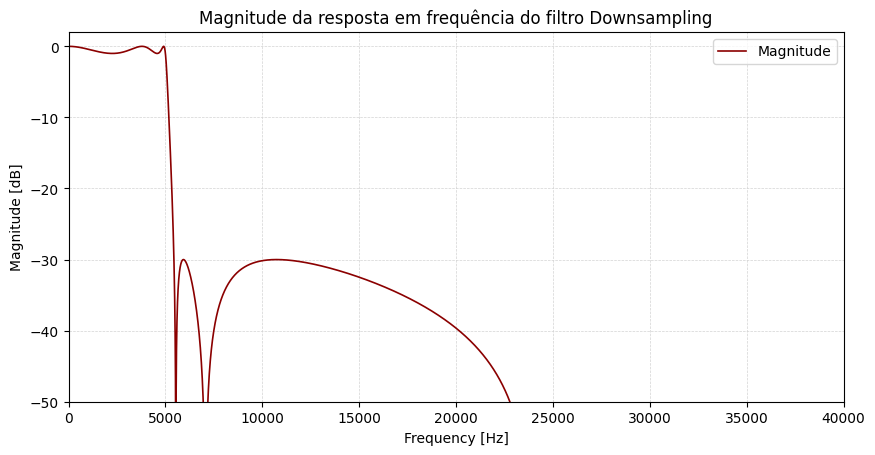

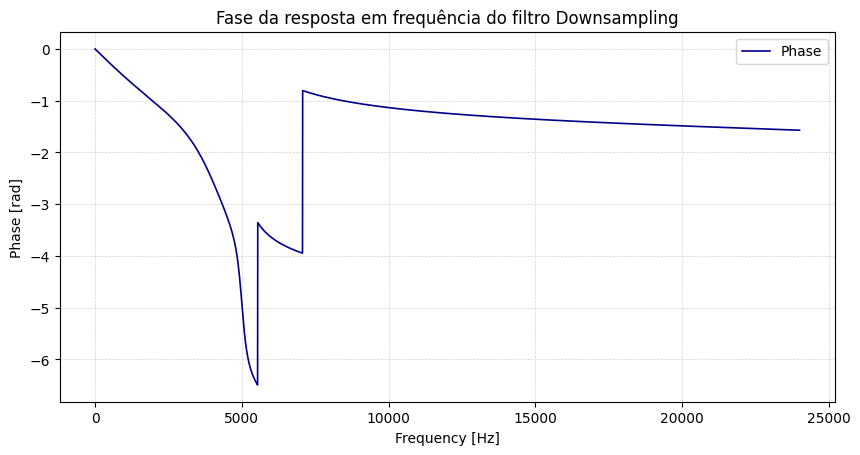

In [ ]:
# Cálculo da resposta em frequência
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10( abs(h)) # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h)) # frequency response phase

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Magnitude da resposta em frequência do filtro Downsampling')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,40000, -50,2])

## Gera legenda
plt.legend()
plt.show()
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_ang , linewidth = 1.20, label = 'Phase', color='darkblue')
plt.title('Fase da resposta em frequência do filtro Downsampling')
plt.ylabel('Phase [rad]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)

## Gera legenda
plt.legend()
plt.show()

In [ ]:
print('Ordem do filtro Downsampling: ', len(a)-1)

Ordem do filtro Downsampling:  5


# Filtro Upsampling
Filtro de upsampling que consiste em fazer o sinal filtrado e subamostrado retornar a sua frequencia original 48 khz. Para tal precisaremos inserir zeros no conteúdo do sinal para igual o tamanho do sinal (número de amostras) ao do sinal original ao igualar suas frequências. Destaca-se também a alteração da frequencia de corte do sinal no filtro devido a alteração da frequencia do sinal de entrada do filtro (anteriormente 48khz e agora 8khz, devido o sinal de entrada ser o sinal subamostrado).

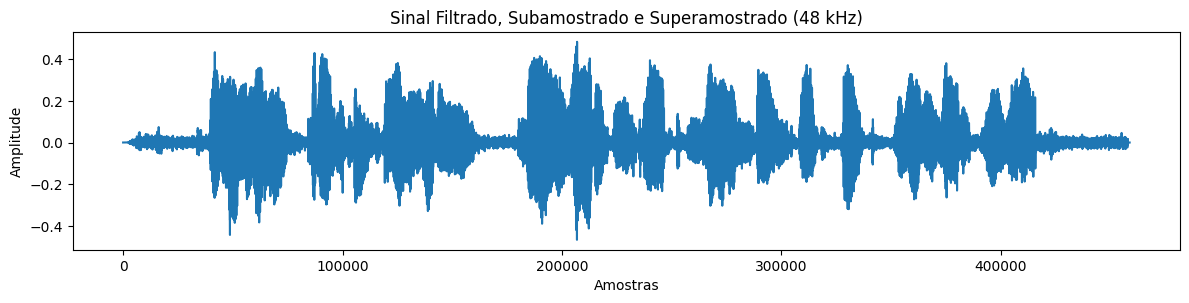

In [ ]:
gp = 1          # Ganho da banda de passagem (dB)
gs = 30         # Ganho da banda de rejeição (atenuação mínima, em dB)
fss2 = 8000     # sampling frequency (Hz)
fp2 = 1000      # passband frequency 02  (Hz)
fs2 = 1500      # stopband frequency 02  (Hz)

# Upsampling factor
upsampling_factor = 6  # 48 kHz / 8 kHz = 6

fn2 = fss / 2    # Nyquist frequency

# Calculate the new passband and stopband frequencies for the higher sampling rate (48 kHz)
fp2_new = fp2 * upsampling_factor
fs2_new = fs2 * upsampling_factor

# Projeto de filtro IIR
filtype = 'ellip'
b, a = sp.iirdesign(fs=fss, wp=fp2_new, ws=fs2_new,
                    gpass=gp, gstop=gs, analog=False,
                    ftype=filtype, output='ba')

# Aplicar o filtro ao sinal de voz
up_signal = sp.lfilter(b, a, down_signal)

# Cálculo da resposta em frequência
fss_new = fss * upsampling_factor
w, h = sp.freqz(b, a, 2**12, fs=fss_new)
h_mag = 20 * np.log10(abs(h))        # frequency response magnitude (dB)
h_ang = np.unwrap(np.angle(h))       # frequency response phase

# Plot dos sinais
plt.figure(figsize=(12, 8))

# Sinal de voz filtrado e subamostrado
plt.subplot(3, 1, 2)
plt.plot(up_signal)
plt.title('Sinal Filtrado, Subamostrado e Superamostrado (48 kHz)')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


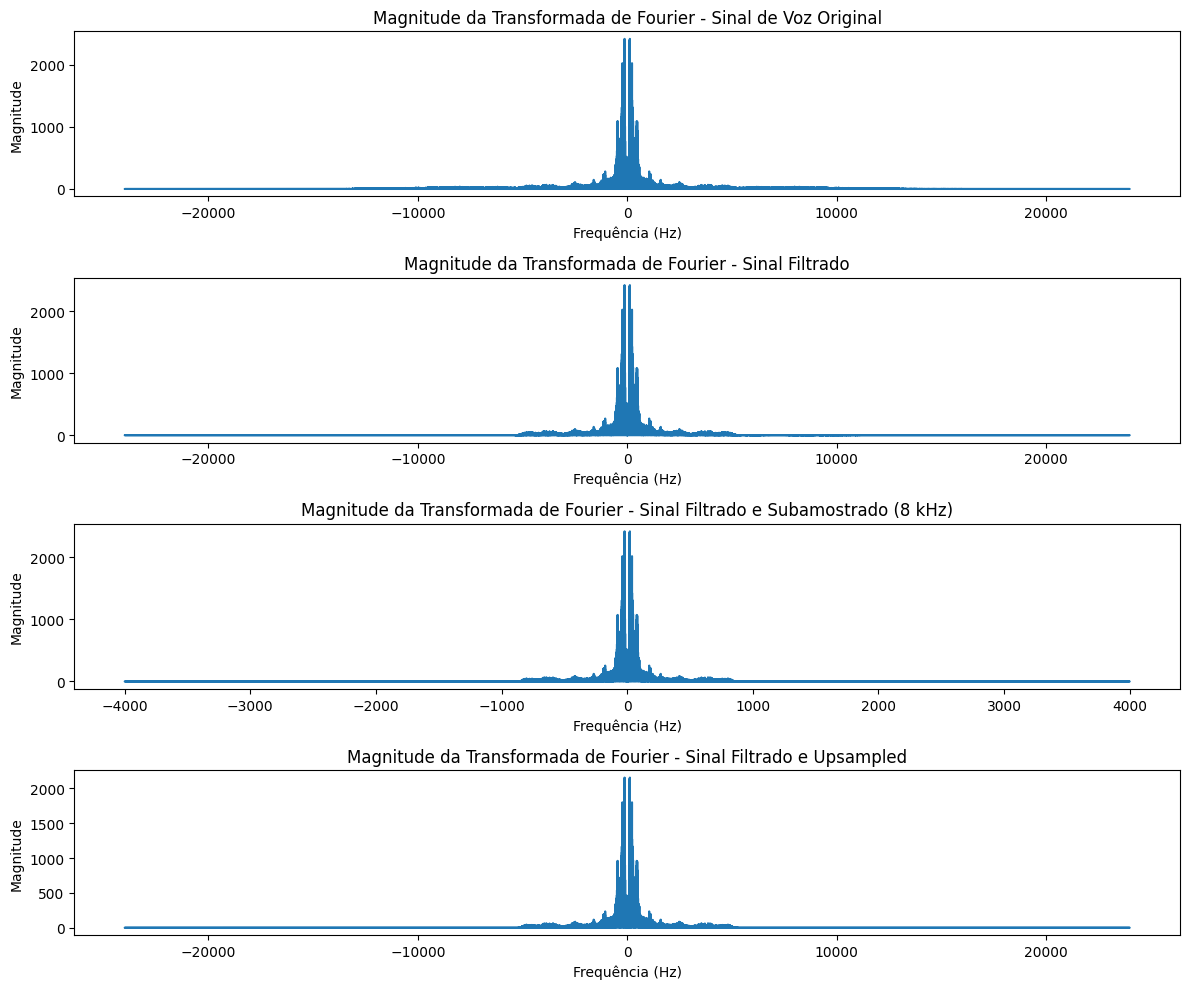

In [ ]:
# Cálculo da Transformada de Fourier
voice_fft = np.abs(np.fft.fft(voice_signal))
filtered_fft = np.abs(np.fft.fft(filtered_signal))
downsampled_fft = np.abs(np.fft.fft(down_signal))
upsampled_fft = np.abs(np.fft.fft(up_signal))

# Frequências correspondentes à Transformada de Fourier
frequencies = np.fft.fftfreq(len(voice_signal), d=1/fs_original)
downsampled_frequencies = np.fft.fftfreq(len(down_signal), d=1/8000)

# Plot dos gráficos da magnitude da Transformada de Fourier
plt.figure(figsize=(12, 10))

# Sinal de voz original
plt.subplot(4, 1, 1)
plt.plot(frequencies, voice_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal de Voz Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado
plt.subplot(4, 1, 2)
plt.plot(frequencies, filtered_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado e subamostrado
plt.subplot(4, 1, 3)
plt.plot(downsampled_frequencies, downsampled_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado e Subamostrado (8 kHz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado e depois upsampling
plt.subplot(4, 1, 4)
plt.plot(frequencies, upsampled_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado e Upsampled')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


Resposta em frequência do filtro.

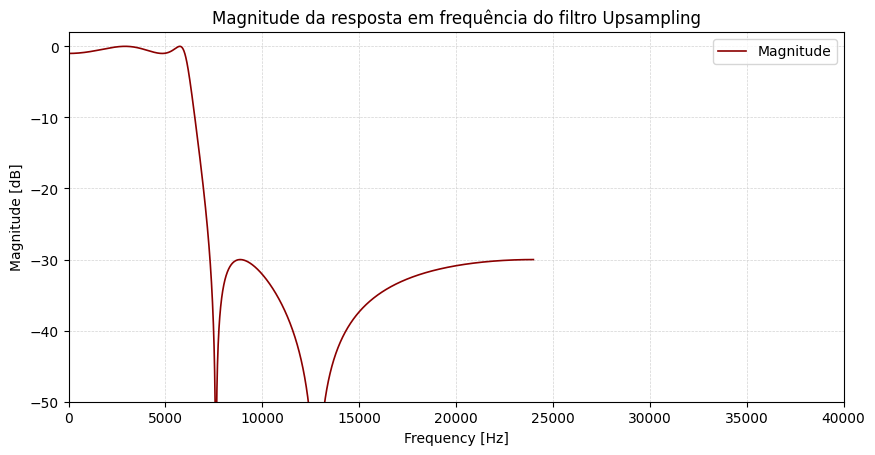

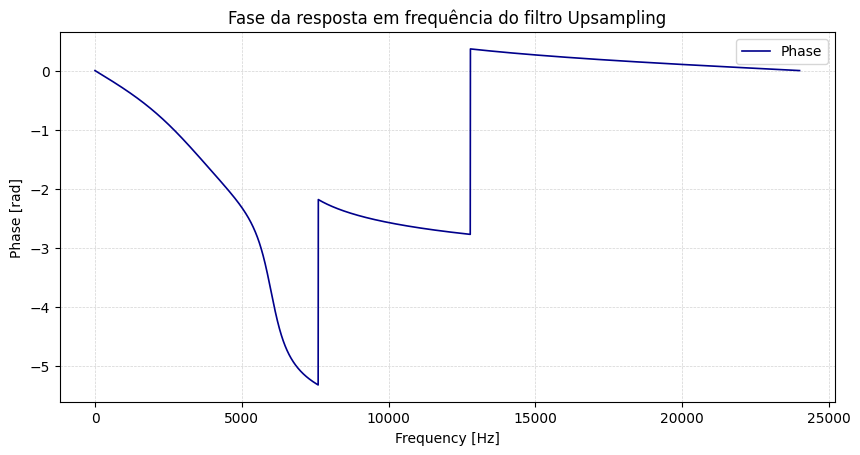

In [ ]:
# Cálculo da resposta em frequência.
w, h = sp.freqz(b, a, 2**12, fs = fss)
h_mag = 20 * np.log10( abs(h))    # Magnitude da resposta de frequência (dB).
h_ang = np.unwrap(np.angle(h))    # Fase de resposta de frequência.

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_mag , linewidth = 1.20, label = 'Magnitude', color='darkred')
plt.title('Magnitude da resposta em frequência do filtro Upsampling')
plt.ylabel('Magnitude [dB]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)
plt.axis([0,40000, -50,2])

## Gera legenda
plt.legend()
plt.show()
print('\n')

# Gráficos da resposta em frequência
fig = plt.figure(figsize=(10, 4.8))
plt.plot( w,h_ang , linewidth = 1.20, label = 'Phase', color='darkblue')
plt.title('Fase da resposta em frequência do filtro Upsampling')
plt.ylabel('Phase [rad]', color = 'black')
plt.xlabel('Frequency [Hz]')
plt.grid(which='both', axis='both', color='LightGray', linestyle='dashed', linewidth = 0.5)

## Gera legenda
plt.legend()
plt.show()

In [ ]:
print('Ordem do filtro Upsampling: ', len(a)-1)

Ordem do filtro Upsampling:  4


# Cálculo e gráficos da Transformada de Fourier dos sinais
Nota-se uma remoção das frequencias mais altas na filtragem LP, uma redução da frequencia na filtragem Downsampling e um retorno a frequencia original na filtragem Upsampling.

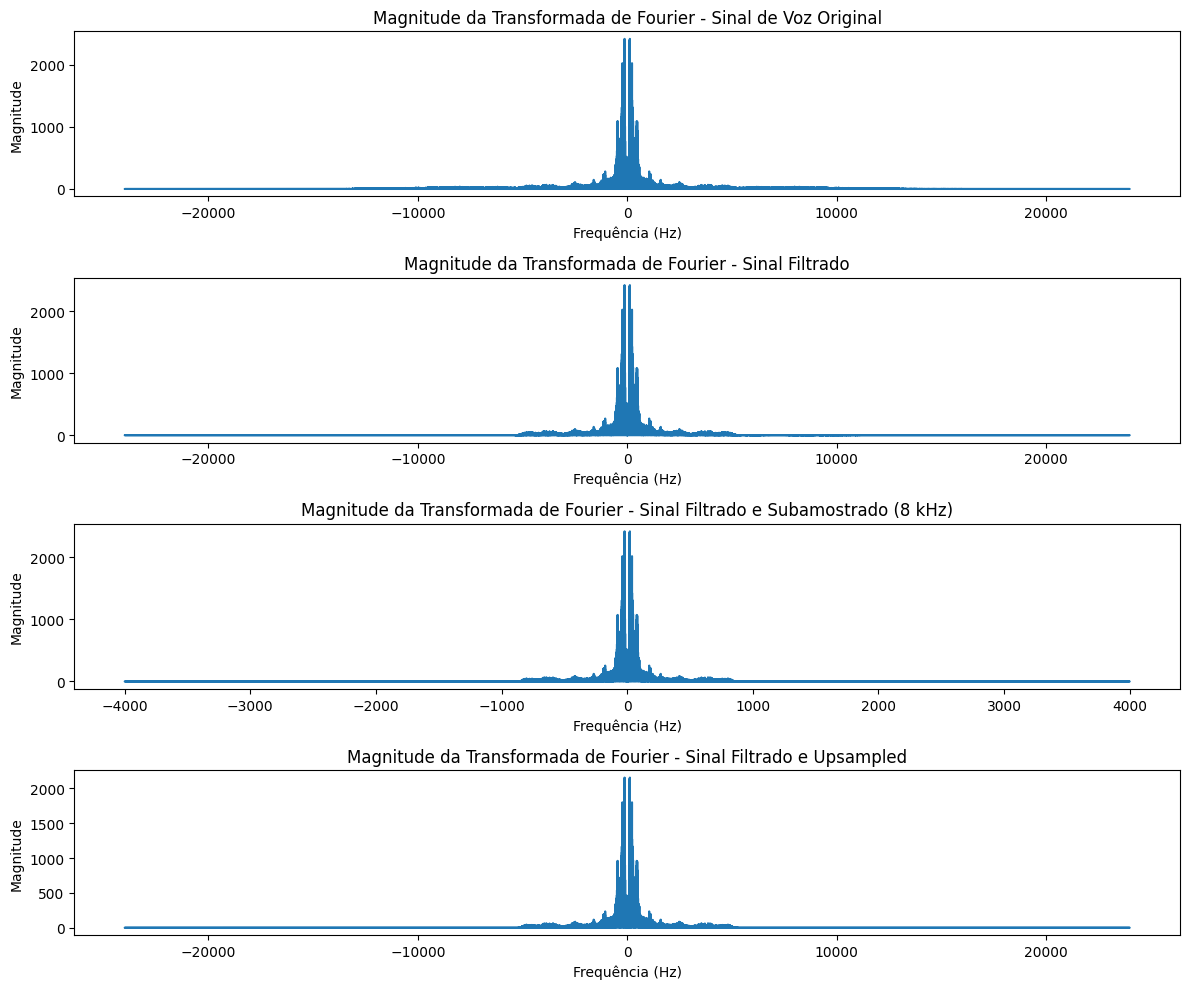

In [ ]:
# Cálculo da Transformada de Fourier
voice_fft = np.abs(np.fft.fft(voice_signal))
filtered_fft = np.abs(np.fft.fft(filtered_signal))
downsampled_fft = np.abs(np.fft.fft(down_signal))
upsampled_fft = np.abs(np.fft.fft(up_signal))

# Frequências correspondentes à Transformada de Fourier
frequencies = np.fft.fftfreq(len(voice_signal), d=1/fs_original)
downsampled_frequencies = np.fft.fftfreq(len(down_signal), d=1/8000)

# Plot dos gráficos da magnitude da Transformada de Fourier
plt.figure(figsize=(12, 10))

# Sinal de voz original
plt.subplot(4, 1, 1)
plt.plot(frequencies, voice_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal de Voz Original')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado
plt.subplot(4, 1, 2)
plt.plot(frequencies, filtered_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado e subamostrado
plt.subplot(4, 1, 3)
plt.plot(downsampled_frequencies, downsampled_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado e Subamostrado (8 kHz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Sinal de voz filtrado e depois upsampling
plt.subplot(4, 1, 4)
plt.plot(frequencies, upsampled_fft)
plt.title('Magnitude da Transformada de Fourier - Sinal Filtrado e Upsampled')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


# Cálculo do MSE
Observa-se baixo MSE, podendo concluir que o sinal possui desvio quadrático médio baixo e portanto possui pouca perda relevante de informação no sinal reamostrado.

In [ ]:
# (c) Calcular o MSE entre o sinal original e sua estimativa
mse = np.mean((voice_signal - up_signal)**2)
print(mse)

0.002085711277807452


# Função de exportação do sinal
Nota-se graves mais estourados no sinal reamostrado, perda de agudos e uma certa distorção derivada da perda de informação no processo de subamostragem e retorno a frequência original no processo de upsampling.

In [ ]:
from scipy.io import wavfile

def export_wav(signal, sample_rate, filename):
    # Normalizar o sinal entre -1 e 1
    signal_norm = signal / np.max(np.abs(signal))

    # Converter o sinal para o tipo de dados adequado para exportação
    signal_export = np.int16(signal_norm * 32767)

    # Converter a taxa de amostragem para um número inteiro
    sample_rate = int(sample_rate)

    # Exportar o sinal para um arquivo WAV
    wavfile.write(filename, sample_rate, signal_export)

    print(f"Sinal exportado para o arquivo '{filename}' com sucesso!")

# Utilizando a função para exportar o sinal reamostrado
export_wav(up_signal, fs_original, "sinal_reamostrado.wav")

Sinal exportado para o arquivo 'sinal_reamostrado.wav' com sucesso!
